In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [3]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [4]:
sess.close()

In [5]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
result

42

In [6]:
result

42

In [7]:
init=tf.global_variables_initializer()
t = tf.global_variables_initializer() # prepare an init node
with tf.Session() as sess:
    init.run() # actually initialize all the variables
    result = f.eval()
    
print(result)

42


###Linear Regression with TensorFlow

In [8]:
import numpy as np
from sklearn.datasets import fetch_california_housing

In [10]:
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
print(housing_data_plus_bias)

[[   1.            8.3252       41.         ...    2.55555556
    37.88       -122.23      ]
 [   1.            8.3014       21.         ...    2.10984183
    37.86       -122.22      ]
 [   1.            7.2574       52.         ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.            1.7          17.         ...    2.3256351
    39.43       -121.22      ]
 [   1.            1.8672       18.         ...    2.12320917
    39.43       -121.32      ]
 [   1.            2.3886       16.         ...    2.61698113
    39.37       -121.24      ]]


In [11]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

In [13]:
with tf.Session() as sess:
    theta_value = theta.eval()

In [14]:
theta_value

array([[-3.7174683e+01],
       [ 4.3591911e-01],
       [ 9.3909204e-03],
       [-1.0637519e-01],
       [ 6.4145899e-01],
       [-4.1128196e-06],
       [-3.7799443e-03],
       [-4.2388692e-01],
       [-4.3728542e-01]], dtype=float32)

In [15]:
from matplotlib import pyplot as plt

(-40.0, 1.0)

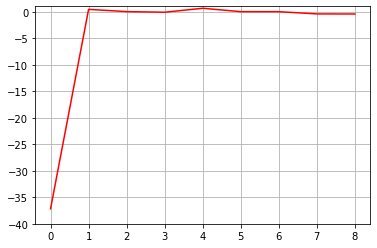

In [16]:
plt.plot(theta_value, color='red')
plt.grid(True,'both')
plt.ylim(-40,1)